# CSE391 
## Assignment 2
##  Due: April 18th at 11:59 pm

Data Science 





This dataset provides crime reports from San Francisco's neighborhoods in 2014. Please explore the data and check what is inside.

Tasks:
1.	Predict the category of the crime based on the time and location information.     


What to use:
You can use any models (regressions, classification, clustering and/or their combinations). 
Please use  Python.  


Data fields Description:
- Dates - timestamp of the crime incident
- Category - category of the crime incident. This is the target variable you are going to predict. Descript - - detailed description of the crime incident
- PdDistrict - name of the Police Department District
- Address - the approximate street address of the crime incident 
- X - Longitude
- Y - Latitude




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

df = pd.read_csv("data_set.csv", parse_dates=["Dates"])
df.head(10)

,Dates,Category,Descript,PdDistrict,Address,X,Y
0,2014-12-28 23:30:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,MISSION,4100 Block of 18TH ST,-122.435563,37.760801
1,2014-12-28 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NaN,NaN,NaN,NaN
2,2014-12-28 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,CENTRAL,500 Block of GEARY ST,-122.412777,37.786834
3,2014-12-28 23:30:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641
4,2014-12-28 23:30:00,ASSAULT,INFLICT INJURY ON COHABITEE,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641
5,2014-12-28 23:30:00,ASSAULT,THREATS AGAINST LIFE,NaN,NaN,NaN,NaN
6,2014-12-28 23:30:00,WARRANTS,WARRANT ARREST,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641
7,2014-12-28 23:30:00,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",NORTHERN,0 Block of ROSE ST,-122.421702,37.773641
8,2014-12-28 23:28:00,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",BAYVIEW,800 Block of JAMESTOWN AV,-122.391150,37.717223
9,2014-12-28 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,CENTRAL,POST ST / JONES ST,-122.413358,37.787664


## Got rid of any rows with NaN

In [7]:
data = df.dropna(axis=0, how='any')
data.head()

,Dates,Category,Descript,PdDistrict,Address,X,Y
0,2014-12-28 23:30:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,MISSION,4100 Block of 18TH ST,-122.435563,37.760801
2,2014-12-28 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,CENTRAL,500 Block of GEARY ST,-122.412777,37.786834
3,2014-12-28 23:30:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641
4,2014-12-28 23:30:00,ASSAULT,INFLICT INJURY ON COHABITEE,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641
6,2014-12-28 23:30:00,WARRANTS,WARRANT ARREST,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641


In [3]:
cm = pd.unique(data['Category'])
dis = pd.unique(data['PdDistrict'])
address = pd.unique(data['Address'])

In [ ]:
#Visualizes data
plt.scatter(df['X'], df['Y'])
plt.show()

plt.scatter(df['Address'], df['Category'])
plt.show()

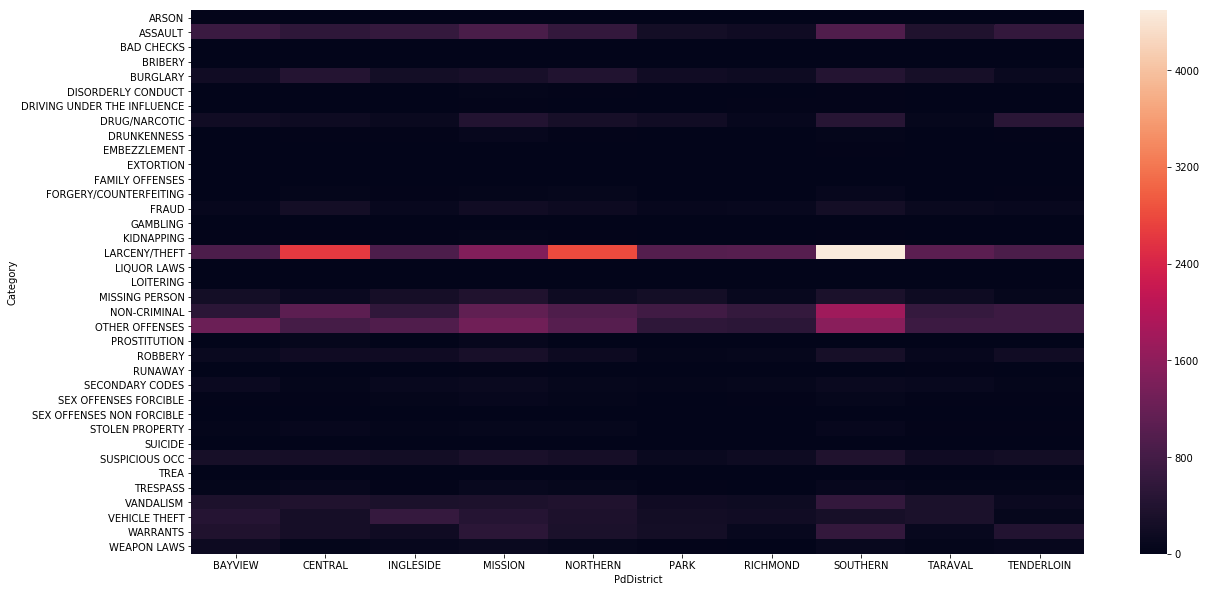

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rows = len(data.axes[0])
v = pd.crosstab(data.Category, data.PdDistrict)

heat_map = sns.heatmap(v)
plt.show()

/Users/arkwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/arkwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


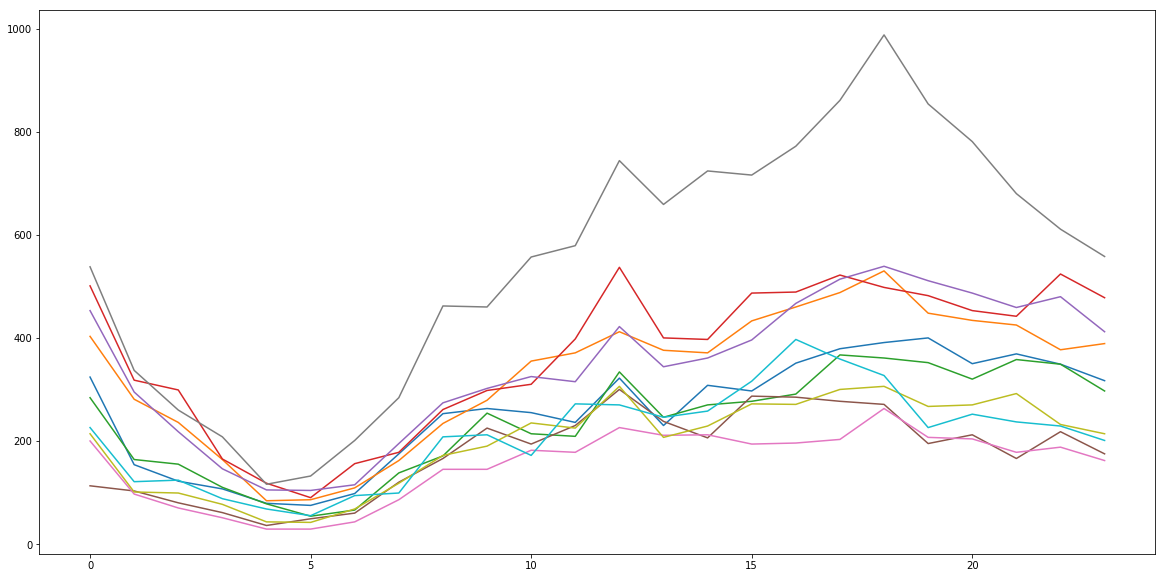

In [26]:
v_data = data
def hr_func(ts):
    return ts.hour

v_data['event'] = 1
v_data['time_hour'] = v_data['Dates'].apply(hr_func)

#citation: https://github.com/kv-kunalvyas/sfcc/blob/master/visualisations/HourlyByDistrict.py
hourly = v_data[['PdDistrict', 'time_hour', 'event']].groupby(['PdDistrict', 'time_hour']).count().reset_index()
hourly_pivot = hourly.pivot(index='time_hour', columns='PdDistrict', values='event').fillna(method='ffill')
plt.plot(hourly_pivot.interpolate())
plt.show()

## Seperated dataframe into features and labels

In [4]:
X = data.drop(columns=['Dates','Category', 'Descript'])
y = data.iloc[:,1]

y.head(10)

0     LARCENY/THEFT
2     VEHICLE THEFT
3           ASSAULT
4           ASSAULT
6          WARRANTS
7           ASSAULT
8           ASSAULT
9     LARCENY/THEFT
10    LARCENY/THEFT
11    LARCENY/THEFT
Name: Category, dtype: object

## Make the data classifier friendly by turning them into enums

In [5]:
cm = pd.unique(data['Address'])
keyToValue_A = {}
valueToKey_A = {}
keyToValue_D = {}
valueToKey_D = {}
i = 0
for item in address:
    if item not in keyToValue_A:
        keyToValue_A[item] = i
        valueToKey_A[i] = item
        i += 1
        
i = 0
for item in dis:
    if item not in keyToValue_D:
        keyToValue_D[item] = i
        valueToKey_D[i] = item
        i += 1

In [6]:
for item in address:
    X['Address'] = X['Address'].replace(item, keyToValue_A[item])
    
for item in dis:
    X['PdDistrict'] = X['PdDistrict'].replace(item, keyToValue_D[item])
X.head(10)

,PdDistrict,Address,X,Y
0,0,0,-122.435563,37.760801
2,1,1,-122.412777,37.786834
3,2,2,-122.421702,37.773641
4,2,2,-122.421702,37.773641
6,2,2,-122.421702,37.773641
7,2,2,-122.421702,37.773641
8,3,3,-122.391150,37.717223
9,1,4,-122.413358,37.787664
10,4,5,-122.411610,37.776221
11,1,6,-122.407152,37.790366


## Split the data into training and test

In [7]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Linear SVC - Doesn't return due to massive size

In [ ]:
#DO NOT RUN THIS
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=1)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
y_pred

## Naive Bayes

In [9]:
#Source for Naive Bayes: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
         
predicted = model.predict(X_test)
print (predicted)

['LARCENY/THEFT' 'LARCENY/THEFT' 'LARCENY/THEFT' ..., 'LARCENY/THEFT'
 'LARCENY/THEFT' 'LARCENY/THEFT']


In [10]:
#compare accuracy between predicted and actual
print(predicted.size)
print(y_test.size)

16932
16932


In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  8  0  0]
 [ 0  0  0 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 19  0  0]
 [ 0  0  0 ...,  8  0  0]
 [ 0  0  0 ...,  2  0  0]]


/Users/arkwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Normalized confusion matrix
[[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.01  0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.02  0.    0.  ]
 [ 0.    0.    0.   ...,  0.01  0.    0.  ]
 [ 0.    0.    0.   ...,  0.01  0.    0.  ]]


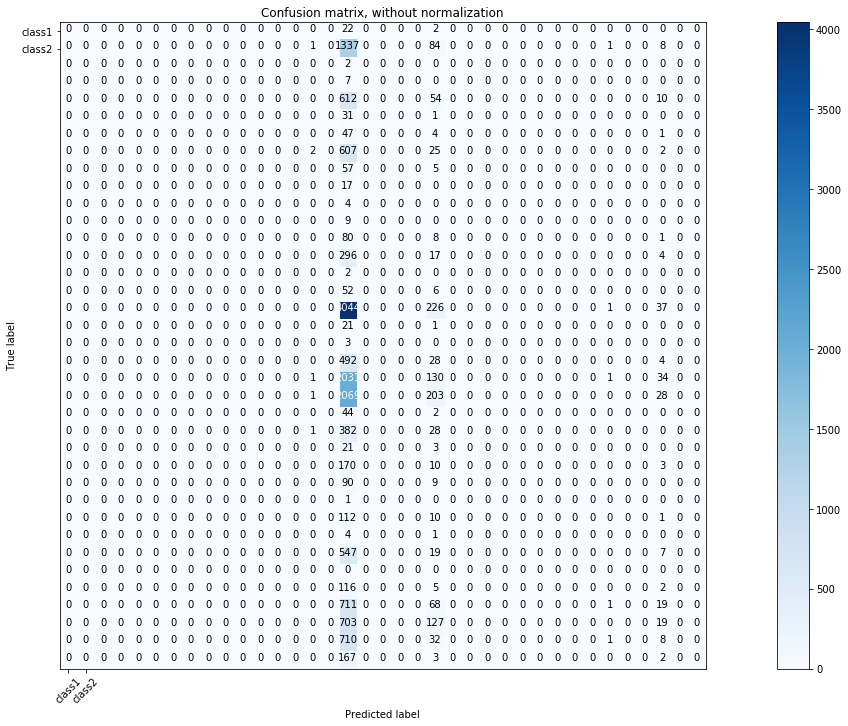

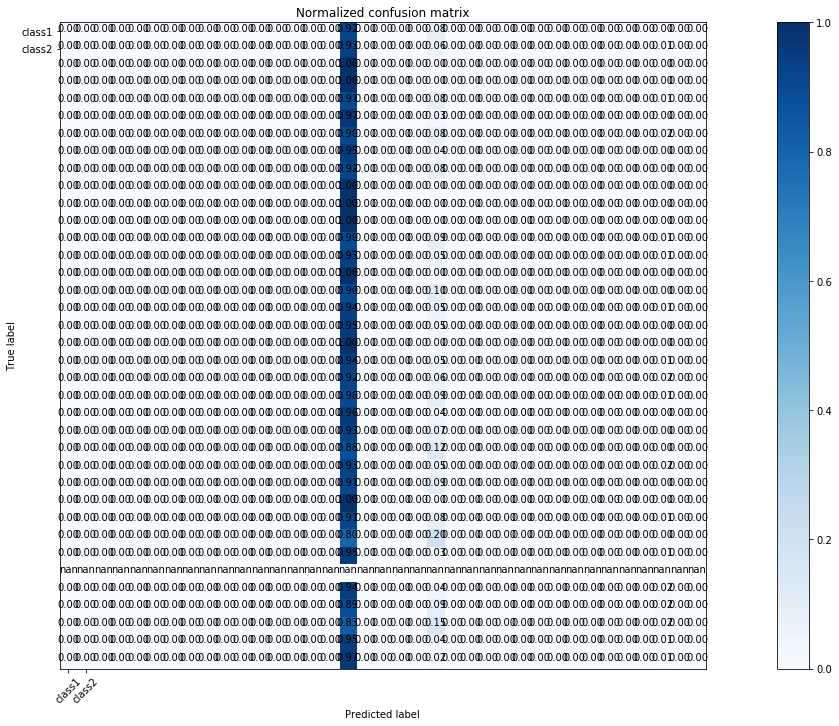

In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
class_names = ["class1", "class2"]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [13]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test, predicted)
cm.print_stats()
#Accuracy: 0.279186476492

/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing
/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN +

Confusion Matrix:

Predicted                    ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  \
Actual                                                                       
ARSON                            0        0           0        0         0   
ASSAULT                          0        0           0        0         0   
BAD CHECKS                       0        0           0        0         0   
BRIBERY                          0        0           0        0         0   
BURGLARY                         0        0           0        0         0   
DISORDERLY CONDUCT               0        0           0        0         0   
DRIVING UNDER THE INFLUENCE      0        0           0        0         0   
DRUG/NARCOTIC                    0        0           0        0         0   
DRUNKENNESS                      0        0           0        0         0   
EMBEZZLEMENT                     0        0           0        0         0   
EXTORTION                        0        0  

## Logistic Regression - not much better than Naive Bayes

In [14]:
#citation: http://www.data-mania.com/blog/logistic-regression-example-in-python/
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test, y_pred)
cm.print_stats()
#accuracy: 0.293185419968

/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing
/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN +

Confusion Matrix:

Predicted                    ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  \
Actual                                                                       
ARSON                            0        0           0        0         0   
ASSAULT                          0        0           0        0         0   
BAD CHECKS                       0        0           0        0         0   
BRIBERY                          0        0           0        0         0   
BURGLARY                         0        0           0        0         0   
DISORDERLY CONDUCT               0        0           0        0         0   
DRIVING UNDER THE INFLUENCE      0        0           0        0         0   
DRUG/NARCOTIC                    0        0           0        0         0   
DRUNKENNESS                      0        0           0        0         0   
EMBEZZLEMENT                     0        0           0        0         0   
EXTORTION                        0        0  

## Attempt to aggregate categories, converting those >5% into "OTHER"

In [47]:
size = data['Category'].size
print(size)
counts = data['Category'].value_counts()[:13]
other_categories = np.array(data['Category'].value_counts()[13:].index)

print(counts)
print(other_categories)
other_count = counts.sum() - size



67725
LARCENY/THEFT     17173
OTHER OFFENSES     9336
NON-CRIMINAL       8736
ASSAULT            5670
VEHICLE THEFT      3220
VANDALISM          3196
WARRANTS           3107
BURGLARY           2740
DRUG/NARCOTIC      2492
SUSPICIOUS OCC     2345
MISSING PERSON     2071
ROBBERY            1593
FRAUD              1346
Name: Category, dtype: int64
['SECONDARY CODES' 'WEAPON LAWS' 'TRESPASS' 'STOLEN PROPERTY'
 'SEX OFFENSES FORCIBLE' 'FORGERY/COUNTERFEITING' 'DRUNKENNESS'
 'KIDNAPPING' 'PROSTITUTION' 'DRIVING UNDER THE INFLUENCE'
 'DISORDERLY CONDUCT' 'ARSON' 'RUNAWAY' 'LIQUOR LAWS' 'EMBEZZLEMENT'
 'FAMILY OFFENSES' 'SUICIDE' 'BRIBERY' 'LOITERING' 'EXTORTION' 'BAD CHECKS'
 'SEX OFFENSES NON FORCIBLE' 'GAMBLING' 'TREA']


In [83]:
new_data = data

In [84]:
new_data['Category'] = new_data['Category'].replace(other_categories, "OTHER")

/Users/arkwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
cm = pd.unique(new_data['Category'])
dis = pd.unique(new_data['PdDistrict'])
address = pd.unique(new_data['Address'])

In [86]:
X = new_data.drop(columns=['Dates','Category', 'Descript'])
y = new_data.iloc[:,1]
y.head(10)

0     LARCENY/THEFT
2     VEHICLE THEFT
3           ASSAULT
4           ASSAULT
6          WARRANTS
7           ASSAULT
8           ASSAULT
9     LARCENY/THEFT
10    LARCENY/THEFT
11    LARCENY/THEFT
Name: Category, dtype: object

In [87]:
keyToValue_A = {}
valueToKey_A = {}
keyToValue_D = {}
valueToKey_D = {}
i = 0
for item in address:
    if item not in keyToValue_A:
        keyToValue_A[item] = i
        valueToKey_A[i] = item
        i += 1

i = 0
for item in dis:
    if item not in keyToValue_D:
        keyToValue_D[item] = i
        valueToKey_D[i] = item
        i += 1
cm

array(['LARCENY/THEFT', 'VEHICLE THEFT', 'ASSAULT', 'WARRANTS',
       'DRUG/NARCOTIC', 'OTHER OFFENSES', 'SUSPICIOUS OCC', 'NON-CRIMINAL',
       'ROBBERY', 'BURGLARY', 'VANDALISM', 'OTHER', 'FRAUD',
       'MISSING PERSON'], dtype=object)

In [88]:
for item in address:
    X['Address'] = X['Address'].replace(item, keyToValue_A[item])
    
for item in dis:
    X['PdDistrict'] = X['PdDistrict'].replace(item, keyToValue_D[item])
X.head(10)

,PdDistrict,Address,X,Y
0,0,0,-122.435563,37.760801
2,1,1,-122.412777,37.786834
3,2,2,-122.421702,37.773641
4,2,2,-122.421702,37.773641
6,2,2,-122.421702,37.773641
7,2,2,-122.421702,37.773641
8,3,3,-122.391150,37.717223
9,1,4,-122.413358,37.787664
10,4,5,-122.411610,37.776221
11,1,6,-122.407152,37.790366


In [89]:
y.unique() #sanity check

array(['LARCENY/THEFT', 'VEHICLE THEFT', 'ASSAULT', 'WARRANTS',
       'DRUG/NARCOTIC', 'OTHER OFFENSES', 'SUSPICIOUS OCC', 'NON-CRIMINAL',
       'ROBBERY', 'BURGLARY', 'VANDALISM', 'OTHER', 'FRAUD',
       'MISSING PERSON'], dtype=object)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 2nd Attempt at Naive Bayes with Aggregated Categories - accuracy wasn't better

In [91]:
model = GaussianNB()
model.fit(X_train, y_train)
         
predicted = model.predict(X_test)

Confusion matrix, without normalization
[[   0    0    0    0 1339    0    0    0   84    0    0    0    8    0]
 [   0    0    0    0  612    0    0    0   54    0    0    0   10    0]
 [   0    0    0    0  609    0    0    0   25    0    0    0    2    0]
 [   0    0    0    0  296    0    0    0   17    0    0    0    4    0]
 [   0    0    0    0 4045    0    0    0  226    0    0    0   37    0]
 [   0    0    0    0  492    0    0    0   28    0    0    0    4    0]
 [   0    0    0    0 2033    0    0    0  130    0    0    0   34    0]
 [   0    0    0    0 1079    0    0    0   70    0    0    0   10    0]
 [   0    0    0    0 2070    0    0    0  203    0    0    0   28    0]
 [   0    0    0    0  383    0    0    0   28    0    0    0    0    0]
 [   0    0    0    0  547    0    0    0   19    0    0    0    7    0]
 [   0    0    0    0  712    0    0    0   68    0    0    0   19    0]
 [   0    0    0    0  703    0    0    0  127    0    0    0   19    0]
 [   0    0

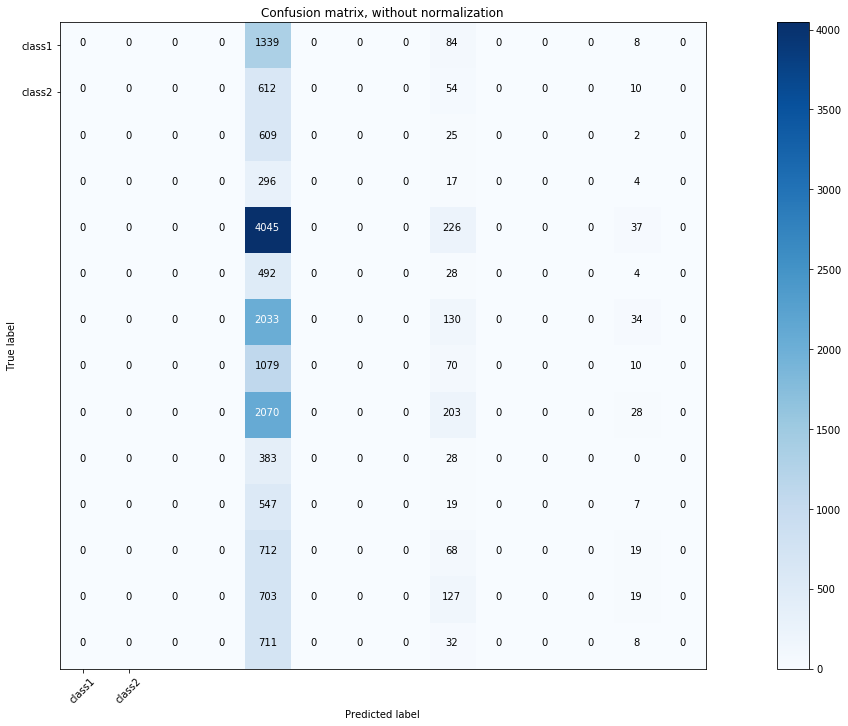

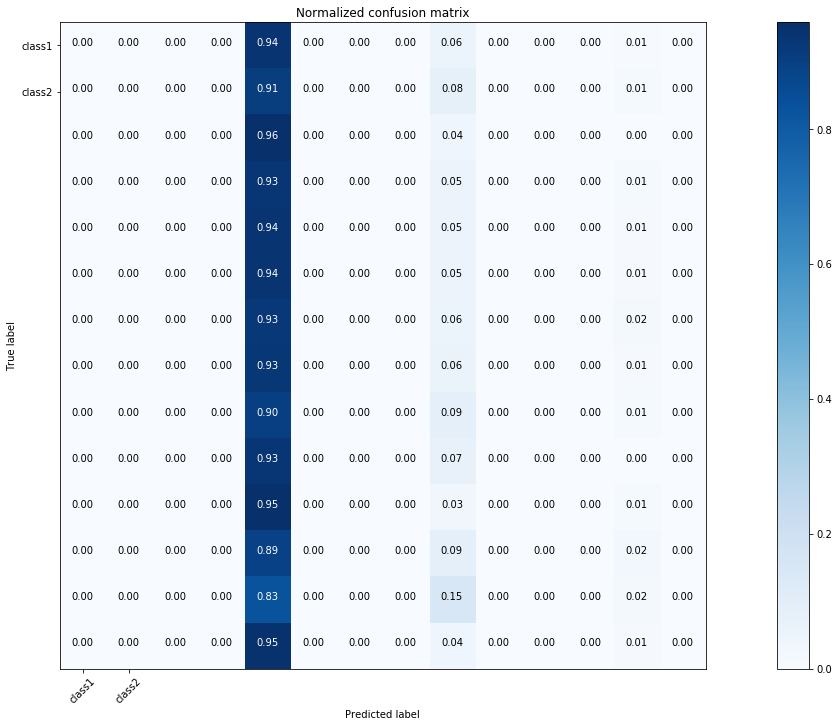

In [92]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = ["class1", "class2"]

# Compute confusion matrix
cnf_matrix = confusion_matrix(np.array(y_test), np.array(predicted))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [93]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test, predicted)
cm.print_stats()

/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing
/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/Users/arkwl/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN +

Confusion Matrix:

Predicted       ASSAULT  BURGLARY  DRUG/NARCOTIC  FRAUD  LARCENY/THEFT  \
Actual                                                                   
ASSAULT               0         0              0      0            280   
BURGLARY              0         0              0      0            149   
DRUG/NARCOTIC         0         0              0      0             83   
FRAUD                 0         0              0      0             80   
LARCENY/THEFT         0         0              0      0           1016   
MISSING PERSON        0         0              0      0            100   
NON-CRIMINAL          0         0              0      0            437   
OTHER                 0         0              0      0            226   
OTHER OFFENSES        0         0              0      0            423   
ROBBERY               0         0              0      0             87   
SUSPICIOUS OCC        0         0              0      0            111   
VANDALISM          

In [ ]:
classifier = svm.SVC(kernel='linear', C=1)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
y_pred